<a href="https://colab.research.google.com/github/pushparani7/OIBSIP_Datascience_1/blob/main/Spam(Oasis_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP 1: Install & Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report, roc_curve, auc)
import warnings
warnings.filterwarnings('ignore')

# **STEP 2: Load and Explore the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('/content/spam.csv', encoding='cp1252')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())


Saving spam.csv to spam (1).csv
Dataset Shape: (5572, 5)

First few rows:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnam

# **STEP 3: Data Cleaning and Preprocessing**


Missing Values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Column Names:
['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

Duplicate rows before: 403
Duplicate rows after: 0

Label Distribution:
label
ham     4516
spam     653
Name: count, dtype: int64

Label Distribution (%):
label
ham     87.366996
spam    12.633004
Name: proportion, dtype: float64


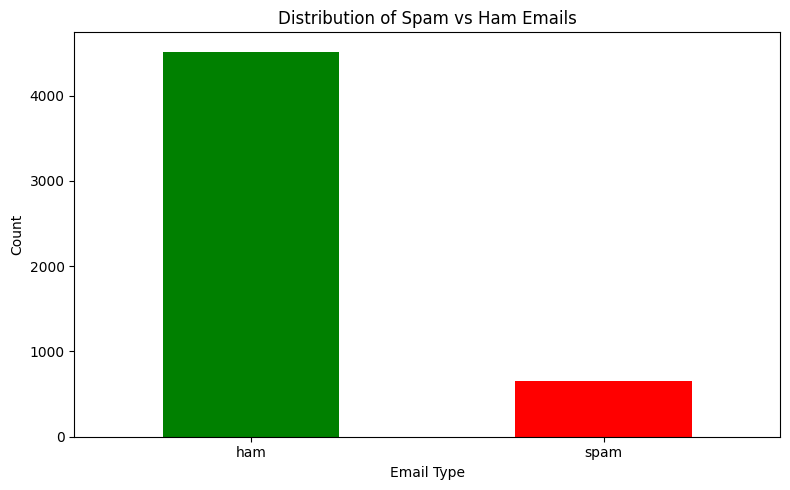

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display column names
print("\nColumn Names:")
print(df.columns.tolist())

# Usually the dataset has columns like 'v1' (label) and 'v2' (email text)
# Rename columns for clarity if needed
if 'v1' in df.columns and 'v2' in df.columns:
    df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# Remove duplicate rows
print(f"\nDuplicate rows before: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate rows after: {df.duplicated().sum()}")

# Check label distribution
print("\nLabel Distribution:")
print(df['label'].value_counts())
print("\nLabel Distribution (%):")
print(df['label'].value_counts(normalize=True) * 100)

# Visualize label distribution
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Spam vs Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **STEP 4: Feature Engineering - Text Vectorization**

In [ ]:
# Convert labels to binary (0 = Ham, 1 = Spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english',
                             lowercase=True, ngram_range=(1, 2))

# Fit and transform the messages
X = vectorizer.fit_transform(df['message'])
y = df['label']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Total samples: {X.shape[0]}")


Feature matrix shape: (5169, 3000)
Number of features: 3000
Total samples: 5169


# **STEP 5: Split Data into Train and Test Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training spam ratio: {y_train.sum() / len(y_train) * 100:.2f}%")
print(f"Test spam ratio: {y_test.sum() / len(y_test) * 100:.2f}%")



Training set size: 4135
Test set size: 1034
Training spam ratio: 12.62%
Test spam ratio: 12.67%


# **STEP 6: Train Multiple Machine Learning Models**

In [ ]:
# Dictionary to store models and their performance
models = {}

# Model 1: Naive Bayes
print("\n" + "="*60)
print("MODEL 1: Multinomial Naive Bayes")
print("="*60)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
models['Naive Bayes'] = nb_model

# Model 2: Logistic Regression
print("\nMODEL 2: Logistic Regression")
print("="*60)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
models['Logistic Regression'] = lr_model

# Model 3: Random Forest
print("\nMODEL 3: Random Forest")
print("="*60)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
models['Random Forest'] = rf_model



MODEL 1: Multinomial Naive Bayes

MODEL 2: Logistic Regression

MODEL 3: Random Forest


# **STEP 7: Evaluate Models**

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("-" * 40)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Ham', 'Spam']))

    return accuracy, precision, recall, f1

# Evaluate all models
results = {}
results['Naive Bayes'] = evaluate_model(y_test, y_pred_nb, 'Naive Bayes')
results['Logistic Regression'] = evaluate_model(y_test, y_pred_lr, 'Logistic Regression')
results['Random Forest'] = evaluate_model(y_test, y_pred_rf, 'Random Forest')



Naive Bayes Performance:
----------------------------------------
Accuracy:  0.9758
Precision: 0.9907
Recall:    0.8168
F1-Score:  0.8954

Confusion Matrix:
[[902   1]
 [ 24 107]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       903
        Spam       0.99      0.82      0.90       131

    accuracy                           0.98      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.98      0.97      1034


Logistic Regression Performance:
----------------------------------------
Accuracy:  0.9545
Precision: 0.9884
Recall:    0.6489
F1-Score:  0.7834

Confusion Matrix:
[[902   1]
 [ 46  85]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       903
        Spam       0.99      0.65      0.78       131

    accuracy                           0.95      1034
   macro avg       0.97      0.82    

# **STEP 8: Compare Models and Visualize Results**


MODEL COMPARISON
                     Accuracy  Precision    Recall  F1-Score
Naive Bayes          0.975822   0.990741  0.816794  0.895397
Logistic Regression  0.954545   0.988372  0.648855  0.783410
Random Forest        0.978723   0.982301  0.847328  0.909836


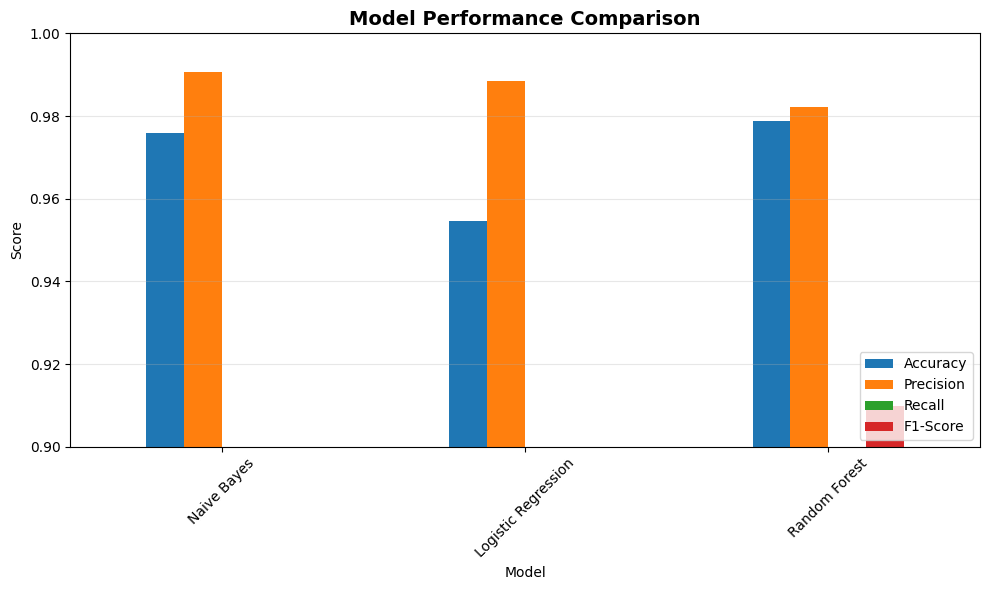

In [ ]:
# Create comparison dataframe
comparison_df = pd.DataFrame(results,
                            index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)
print(comparison_df)

# Plot model comparison
fig, ax = plt.subplots(figsize=(10, 6))
comparison_df.plot(kind='bar', ax=ax)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.ylim([0.9, 1.0])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **STEP 9: Confusion Matrix Visualization**

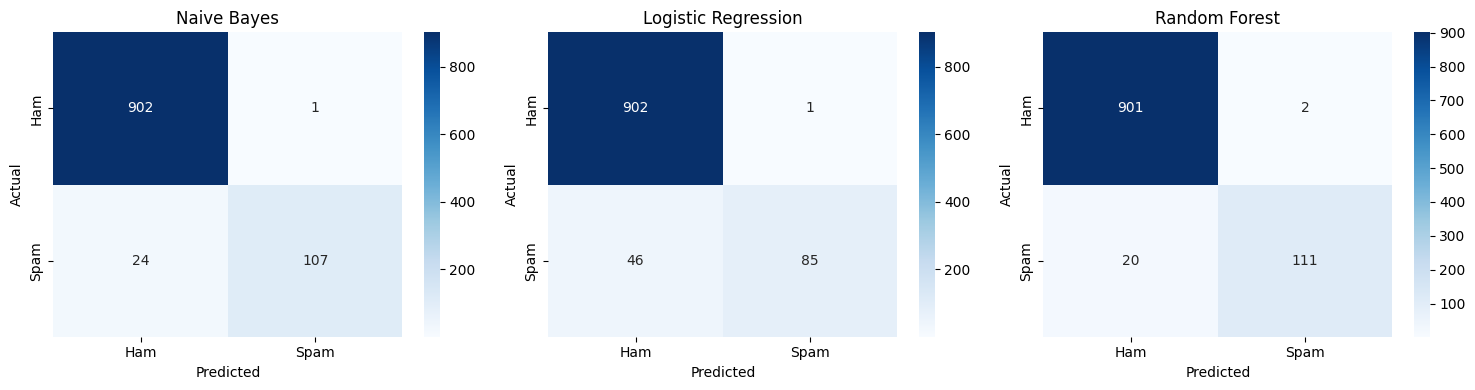

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

confusion_matrices = [cm_nb, cm_lr, cm_rf]
model_names = ['Naive Bayes', 'Logistic Regression', 'Random Forest']

for idx, (cm, name, ax) in enumerate(zip(confusion_matrices, model_names, axes)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Ham', 'Spam'],
                yticklabels=['Ham', 'Spam'])
    ax.set_title(f'{name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# **STEP 10: Test the Model on New Emails**

In [ ]:
def predict_email(email_text, model, vectorizer):
    """Predict if an email is spam or ham"""
    email_tfidf = vectorizer.transform([email_text])
    prediction = model.predict(email_tfidf)[0]
    probability = model.predict_proba(email_tfidf)[0]

    label = 'SPAM' if prediction == 1 else 'HAM'
    spam_prob = probability[1] * 100

    return label, spam_prob

# Use the best performing model (typically Naive Bayes or Logistic Regression)
best_model = nb_model  # or lr_model or rf_model

print("\n" + "="*60)
print("TEST ON NEW EMAILS")
print("="*60)

# Test emails
test_emails = [
    "Hey, how are you doing? Let's catch up soon!",
    "Congratulations! You've won $1000000! Click here to claim your prize!!!",
    "Meeting at 3 PM tomorrow in the conference room",
    "URGENT: Your bank account has been compromised! Verify your details NOW",
    "Check out this amazing offer for free money!",
]

for email in test_emails:
    label, prob = predict_email(email, best_model, vectorizer)
    print(f"\nEmail: {email}")
    print(f"Prediction: {label} (Spam Probability: {prob:.2f}%)")
    print("-" * 60)



TEST ON NEW EMAILS

Email: Hey, how are you doing? Let's catch up soon!
Prediction: HAM (Spam Probability: 0.38%)
------------------------------------------------------------

Email: Congratulations! You've won $1000000! Click here to claim your prize!!!
Prediction: SPAM (Spam Probability: 90.76%)
------------------------------------------------------------

Email: Meeting at 3 PM tomorrow in the conference room
Prediction: HAM (Spam Probability: 1.35%)
------------------------------------------------------------

Email: URGENT: Your bank account has been compromised! Verify your details NOW
Prediction: HAM (Spam Probability: 36.42%)
------------------------------------------------------------

Email: Check out this amazing offer for free money!
Prediction: HAM (Spam Probability: 17.08%)
------------------------------------------------------------


# **STEP 11: Feature Importance (for Logistic Regression)**

In [ ]:
print("\n" + "="*60)
print("TOP SPAM INDICATORS (Most Important Features)")
print("="*60)

# Get feature names and coefficients
feature_names = np.array(vectorizer.get_feature_names_out())
coefficients = lr_model.coef_[0]

# Get top spam indicators
top_spam_indices = np.argsort(coefficients)[-10:]
top_spam_features = feature_names[top_spam_indices]
top_spam_coefs = coefficients[top_spam_indices]

print("\nTop 10 Spam Indicators:")
for feature, coef in zip(top_spam_features[::-1], top_spam_coefs[::-1]):
    print(f"{feature}: {coef:.4f}")

# Get top ham indicators
top_ham_indices = np.argsort(coefficients)[:10]
top_ham_features = feature_names[top_ham_indices]
top_ham_coefs = coefficients[top_ham_indices]

print("\nTop 10 Ham Indicators:")
for feature, coef in zip(top_ham_features, top_ham_coefs):
    print(f"{feature}: {coef:.4f}")

print("\n" + "="*60)
print("PROJECT COMPLETE!")
print("="*60)


TOP SPAM INDICATORS (Most Important Features)

Top 10 Spam Indicators:
txt: 3.7605
mobile: 3.7065
www: 3.2911
uk: 3.2845
reply: 3.2811
claim: 3.1890
text: 2.8700
free: 2.7224
50: 2.7109
prize: 2.6883

Top 10 Ham Indicators:
ok: -1.6566
ll: -1.3792
come: -1.2873
home: -1.2701
lt: -1.2424
da: -1.2406
gt: -1.2322
got: -1.1746
going: -1.1581
lor: -1.1483

PROJECT COMPLETE!
